# Qui jugarà el proper partit?

VARIABLES: rendiment, recanvi, amistat

* SI te un bon rendiment a l'entrenament i l'amistat es mitjana o bona jugará prou (Busquets)
* Si te un mal rendiment a l'entrenament i l'amistat es bona jugará prou (F.T.)
* Si te un mal rendiment a l'entrenament i l'amistat es dolenta jugará poc (Rakitic)
* Si te un bon rendiment a l'entrenament, l'amistat es dolenta i no te recanvi jugará molt (Messi en Setien)
* Si te un bon rendiment a l'entrenament, l'amistat es dolenta i te recanvi jugará poc (Etoo en Guardiola)
* Si te un molt bon rendiment a l'entrenament, l'amistat es dolenta i te recanvi jugará molt (Parejo en Setien)

In [93]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [94]:
# Variables d'entrada
rendiment = ctrl.Antecedent(np.arange(0, 11, 1), 'rendiment')
recanvi = ctrl.Antecedent(np.arange(0, 11, 1), 'recanvi')
relacio = ctrl.Antecedent(np.arange(0, 11, 1), 'relacio')

# Variable de sortida
jugara = ctrl.Consequent(np.arange(0, 91, 1), 'jugara')

In [95]:
# Funcions de pertinença automàtiques   
rendiment.automf(3)
recanvi.automf(3)
relacio.automf(3)

In [96]:
# Funcions de pertinença personalitzades
jugara['poc'] = fuzz.trimf(jugara.universe, [0, 0, 45])
jugara['prou'] = fuzz.trimf(jugara.universe, [0, 45, 90])
jugara['molt'] = fuzz.trimf(jugara.universe, [45, 90, 90])

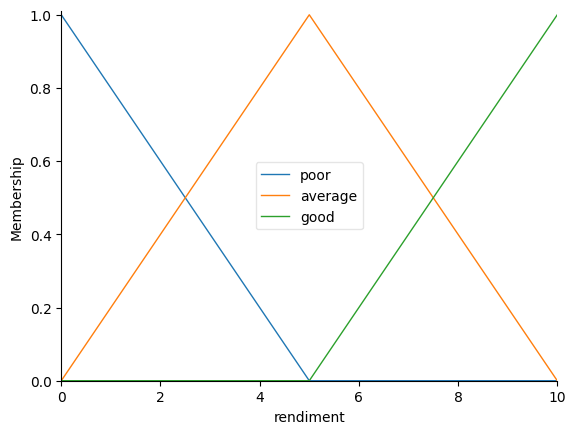

In [97]:
rendiment.view()

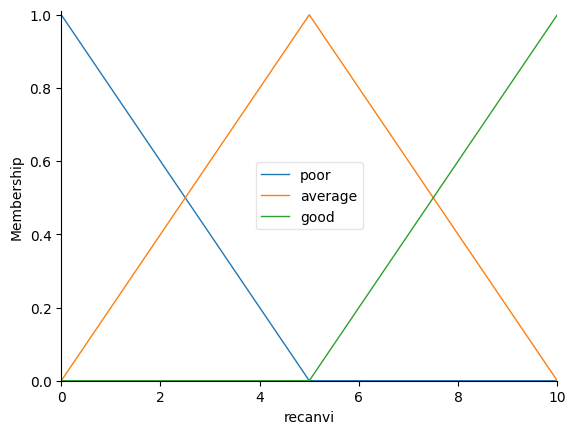

In [98]:
recanvi.view()

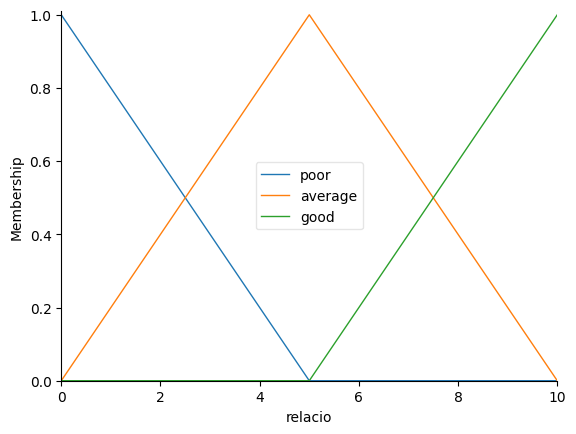

In [99]:
relacio.view()

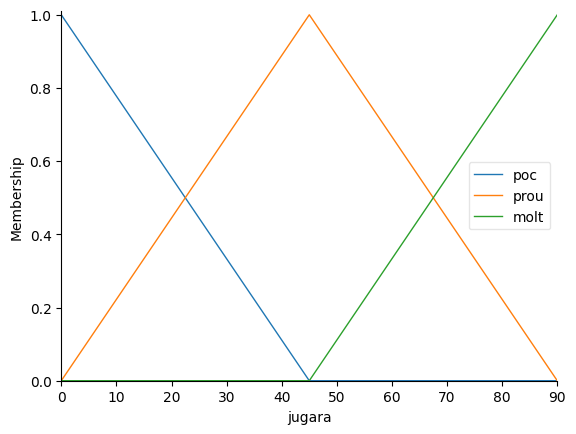

In [100]:
jugara.view()

In [101]:
# Regles

# SI te un bon rendiment a l'entrenament i l'amistat es mitjana o bona jugará prou (Busquets)
# Si te un mal rendiment a l'entrenament i l'amistat es bona jugará prou (F.T.)
# Si te un mal rendiment a l'entrenament i l'amistat es dolenta jugará poc (Rakitic)
# Si te un bon rendiment a l'entrenament, l'amistat es dolenta i no te recanvi jugará molt (Messi en Setien)
# Si te un rendiment mitjà l'entrenament, l'amistat es dolenta i te recanvi jugará poc (Etoo en Guardiola)
# Si te un molt bon rendiment a l'entrenament, l'amistat es dolenta i te recanvi jugará molt (Parejo en Setien)

rule1 = ctrl.Rule(rendiment['good'] & (relacio['average'] | relacio['good']), jugara['prou'])
rule2 = ctrl.Rule(rendiment['poor'] & relacio['good'], jugara['prou'])
rule3 = ctrl.Rule(rendiment['poor'] & relacio['poor'], jugara['poc'])
rule4 = ctrl.Rule(rendiment['good'] & relacio['poor'] & (recanvi['poor'] | recanvi['average']), jugara['molt'])
rule5 = ctrl.Rule(rendiment['good'] & relacio['poor'] & recanvi['good'], jugara['poc'])
rule6 = ctrl.Rule(rendiment['average'] & relacio['poor'] & recanvi['good'], jugara['molt'])

control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])

In [102]:
# Simulació
simulacio = ctrl.ControlSystemSimulation(control)

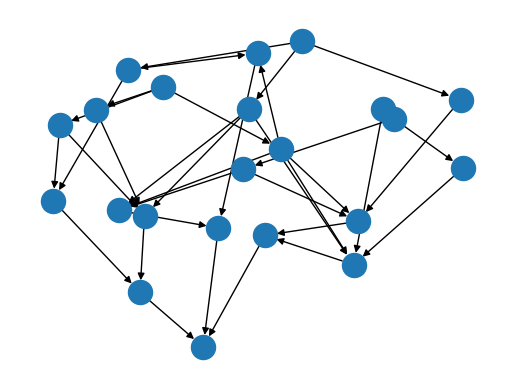

In [103]:
control.view()

In [104]:
# Entrada de dades

simulacio.input['rendiment'] = 8
simulacio.input['recanvi'] = 3
simulacio.input['relacio'] = 2

52.902439024390226


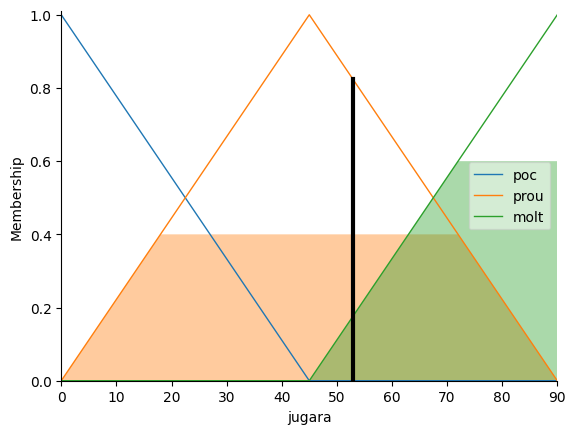

In [105]:
simulacio.compute()
print(simulacio.output['jugara'])
jugara.view(sim=simulacio)

18.374999999999996


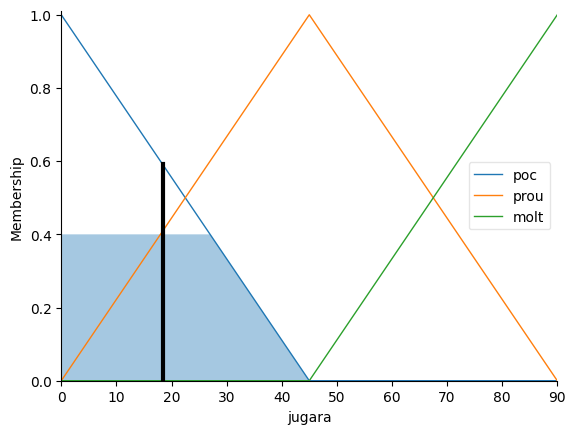

In [106]:
# Entrada de dades 2

simulacio.input['rendiment'] = 3
simulacio.input['recanvi'] = 3
simulacio.input['relacio'] = 2

simulacio.compute()
print(simulacio.output['jugara'])
jugara.view(sim=simulacio)

45.00000000000002


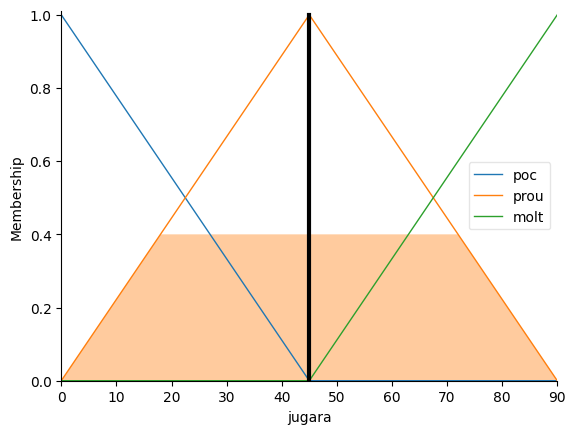

In [107]:
# Entrada de dades 3

simulacio.input['rendiment'] = 3
simulacio.input['recanvi'] = 3
simulacio.input['relacio'] = 8

simulacio.compute()
print(simulacio.output['jugara'])
jugara.view(sim=simulacio)